In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
datos = pd.read_csv('data_equilibrada.csv')
datos.tokens=datos.tokens.apply(literal_eval)

In [ ]:
bow = pd.read_csv('bow.csv')

In [ ]:
tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

In [ ]:
X=tfidf.values
y=datos.etiquetas.values

In [ ]:
dt = DecisionTreeClassifier(max_depth=90,class_weight='balanced')
cv_dt=cross_validate(dt, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
print("Coeficiente de variacion:",cv_dt['test_accuracy'].std()/cv_dt['test_accuracy'].mean())
pd.DataFrame(cv_dt).describe()

Coeficiente de variacion: 0.06439326842544132


,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.391169,0.004638,0.824880,0.819064,0.824880
std,0.043775,0.001306,0.054497,0.056064,0.054497
min,0.312191,0.001994,0.675676,0.662939,0.675676
25%,0.361921,0.003989,0.783784,0.786386,0.783784
50%,0.382747,0.004986,0.831081,0.826978,0.831081
75%,0.423885,0.004987,0.854730,0.853576,0.854730
max,0.463280,0.007978,0.905405,0.904429,0.905405


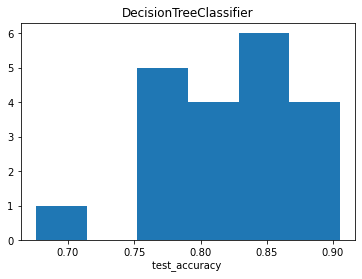

In [ ]:
plt.hist(cv_dt['test_accuracy'],bins=6)
plt.title("DecisionTreeClassifier")
plt.xlabel("test_accuracy ")
plt.show()

In [ ]:
logreg = LogisticRegression(C=8,l1_ratio=0.3,penalty='elasticnet',max_iter=1000,solver='saga',multi_class='multinomial',n_jobs=-1)
cv_logreg=cross_validate(logreg, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
print("Coeficiente de variacion:",cv_logreg['test_accuracy'].std()/cv_logreg['test_accuracy'].mean())
pd.DataFrame(cv_logreg).describe()

Coeficiente de variacion: 0.06295337746919209


,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,15.902764,0.008140,0.880331,0.875152,0.880331
std,2.679964,0.004848,0.056860,0.060538,0.056860
min,12.304668,0.001995,0.770270,0.763382,0.770270
25%,13.437785,0.002991,0.847973,0.840336,0.847973
50%,16.265780,0.010489,0.891892,0.884584,0.891892
75%,18.426196,0.011602,0.922297,0.922728,0.922297
max,19.844213,0.015024,0.959459,0.959371,0.959459


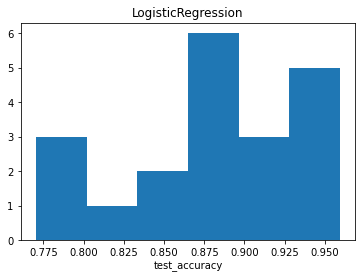

In [ ]:
plt.hist(cv_logreg['test_accuracy'],bins=6)
plt.title("LogisticRegression")
plt.xlabel("test_accuracy")
plt.show()

In [ ]:
svm = LinearSVC(C=1)
cv_svm=cross_validate(svm, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
print("Coeficiente de variacion:",cv_svm['test_accuracy'].std()/cv_svm['test_accuracy'].mean())
pd.DataFrame(cv_svm).describe()

Coeficiente de variacion: 0.06570785309455694


,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.058346,0.003451,0.870872,0.863412,0.870872
std,0.006649,0.000927,0.058710,0.064481,0.058710
min,0.050864,0.001998,0.756757,0.740688,0.756757
25%,0.054852,0.002992,0.834459,0.812523,0.834459
50%,0.056348,0.002994,0.871622,0.862077,0.871622
75%,0.061086,0.003990,0.918919,0.919891,0.918919
max,0.079785,0.004988,0.972973,0.972809,0.972973


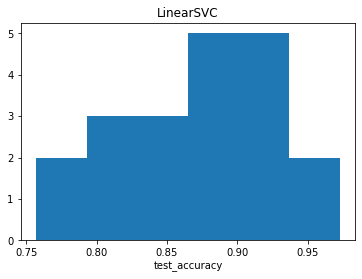

In [ ]:
plt.hist(cv_svm['test_accuracy'],bins=6)
plt.title("LinearSVC")
plt.xlabel("test_accuracy")
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=8,metric='cosine',weights='distance',n_jobs=-1)
cv_knn=cross_validate(knn, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
print("Coeficiente de variacion:",cv_knn['test_accuracy'].std()/cv_knn['test_accuracy'].mean())
pd.DataFrame(cv_knn).describe()

Coeficiente de variacion: 0.06477341483551097


,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.016954,0.071508,0.855979,0.849722,0.855979
std,0.001294,0.020179,0.056885,0.061670,0.056885
min,0.014959,0.045877,0.729730,0.719142,0.729730
25%,0.015956,0.052859,0.810811,0.806714,0.810811
50%,0.016954,0.069315,0.857090,0.843262,0.857090
75%,0.017951,0.086020,0.905405,0.902078,0.905405
max,0.019946,0.113697,0.945946,0.945959,0.945946


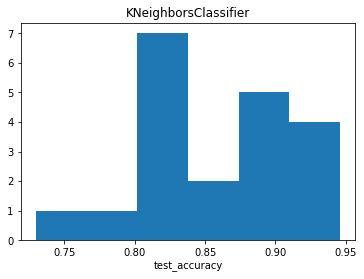

In [ ]:
plt.hist(cv_knn['test_accuracy'],bins=6)
plt.title("KNeighborsClassifier")
plt.xlabel("test_accuracy")
plt.show()

In [ ]:
# print(cv_knn['test_accuracy'].mean(),cv_knn['test_accuracy'].std())
# print(cv_knn['test_f1_weighted'].mean(),cv_knn['test_f1_weighted'].std())
# print(cv_knn['test_recall_weighted'].mean(),cv_knn['test_recall_weighted'].std())
# plt.plot(cv_knn['test_accuracy'],'o')
# plt.show()

In [ ]:
from sklearn.metrics import SCORERS as prueba 

In [ ]:
prueba.keys()

In [ ]:
import joblib

In [ ]:
datos = pd.read_csv('data_equilibrada.csv')
datos.tokens=datos.tokens.apply(literal_eval)
bow = pd.read_csv('bow.csv')

In [ ]:
vectorizer=TfidfVectorizer(vocabulary=bow.token.values).fit(datos['tokens'].str.join(" "))
tfidf=pd.DataFrame(vectorizer.transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

In [ ]:
joblib.dump(vectorizer,'vectorizer_interno.joblib')

['vectorizer_interno.joblib']

In [ ]:
modelo=LogisticRegression(C=8,l1_ratio=0.3,penalty='elasticnet',max_iter=1000,solver='saga',multi_class='multinomial',n_jobs=-1).fit(X,y)

In [ ]:
joblib.dump(modelo,'modelo_interno.joblib')

['modelo_interno.joblib']